In [1]:
import pandas as pd
from nsepy import get_history
import datetime as dt
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from statsmodels.tsa.api import VAR
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

In [2]:
from nsepy import get_history
import datetime as dt
import yfinance as yf

# Define the start and end dates
start = dt.datetime(2021, 6, 1)
end = dt.datetime(2022, 1, 5)
symbol='AXISBANK.NS'

stk_data=yf.download(symbol, start=start, end=end)
stk_data

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-06-01,753.549988,754.000000,741.150024,745.150024,741.915161,6660243
2021-06-02,744.799988,745.299988,734.200012,737.000000,733.800537,9973043
2021-06-03,743.000000,752.250000,739.000000,750.650024,747.391296,8170508
2021-06-04,751.000000,759.900024,740.099976,742.049988,738.828552,10336011
2021-06-07,743.099976,753.950012,741.500000,751.099976,747.839294,6986728
...,...,...,...,...,...,...
2021-12-29,674.500000,679.599976,667.250000,670.500000,667.589233,3969894
2021-12-30,668.000000,673.099976,664.500000,668.849976,665.946350,5119705
2021-12-31,672.950012,686.500000,671.200012,678.549988,675.604309,5586980


In [3]:
stk_data=stk_data[['Open','High','Low','Close']]
stk_data

,Open,High,Low,Close
Date,,,,
2021-06-01,753.549988,754.000000,741.150024,745.150024
2021-06-02,744.799988,745.299988,734.200012,737.000000
2021-06-03,743.000000,752.250000,739.000000,750.650024
2021-06-04,751.000000,759.900024,740.099976,742.049988
2021-06-07,743.099976,753.950012,741.500000,751.099976
...,...,...,...,...
2021-12-29,674.500000,679.599976,667.250000,670.500000
2021-12-30,668.000000,673.099976,664.500000,668.849976
2021-12-31,672.950012,686.500000,671.200012,678.549988


In [4]:
from sklearn.preprocessing import MinMaxScaler
Ms = MinMaxScaler()
data1= Ms.fit_transform(stk_data)
print("Len:",data1.shape)

Len: (150, 4)


In [5]:
data1=pd.DataFrame(data1,columns=["Open","High","Low","Close"])

In [6]:
data1

,Open,High,Low,Close
0,0.526696,0.439563,0.524937,0.484794
1,0.483034,0.396376,0.485771,0.442784
2,0.474052,0.430876,0.512820,0.513145
3,0.513972,0.468851,0.519019,0.468814
4,0.474551,0.439315,0.526909,0.515464
...,...,...,...,...
145,0.132236,0.070241,0.108481,0.100000
146,0.099800,0.037974,0.092984,0.091495
147,0.124501,0.104492,0.130741,0.141495
148,0.160928,0.164060,0.174697,0.233247


In [7]:
training_size = round(len(data1 ) * 0.80)
print(training_size)
X_train=data1[:training_size]
X_test=data1[training_size: ]
print("X_train length:",X_train.shape)
print("X_test length:",X_test.shape)
y_train=data1[:training_size]
y_test=data1[training_size: ]
print("y_train length:",y_train.shape)
print("y_test length:",y_test.shape)

120
X_train length: (120, 4)
X_test length: (30, 4)
y_train length: (120, 4)
y_test length: (30, 4)


In [8]:
import warnings
warnings.filterwarnings("ignore")

In [9]:
performance={"Model":[],"RMSE":[],"MaPe":[],"Lag":[],"Test":[]}

In [10]:
performance

{'Model': [], 'RMSE': [], 'MaPe': [], 'Lag': [], 'Test': []}

In [11]:
listt=["Close","High","Open","Low"]
listt

['Close', 'High', 'Open', 'Low']

In [12]:
datasetTwo=[listt]
test_obs = 28
train =datasetTwo[:-test_obs]
test = datasetTwo[-test_obs:]

In [13]:
from statsmodels.tsa.api import VAR

In [14]:
listt=["Close","High","Open","Low"]
#listt=["AQI_calculated","PM10","PM2.5","NOx","NO2","NO","NH3","SO2","CO",'year']


In [15]:
def cominbation(dataset, listt):
    datasetTwo = pd.DataFrame(dataset, columns=listt)
    test_obs = 28
    train = datasetTwo[:-test_obs]
    test = datasetTwo[-test_obs:]
    
    # Train the VAR model
    model = VAR(train)
    order = model.select_order(maxlags=12).selected_orders["aic"]
    result = model.fit(order)
    
    # Forecast the next values
    lagged_Values = train.values[-order:]
    pred = result.forecast(y=lagged_Values, steps=test_obs)
    preds = pd.DataFrame(pred, columns=listt)
    preds.to_csv("varforecasted_{}.csv".format(test_obs))
    
    # Calculate performance metrics
    rmse = round(mean_squared_error(test, pred, squared=False))
    mape = mean_absolute_percentage_error(test, pred)
    
    performance = {
        "Model": [listt],
        "RMSE": [rmse],
        "MAPE": [mape],
        "Lag": [order],
        "Test": [test_obs]
    }
    perf = pd.DataFrame(performance)
    return perf, result, pred, test

# Define the list of columns to use in the VAR model
listt = ["Open", "High", "Low", "Close"]
perf, result, pred, test = cominbation(data1, listt)

# Print the performance metrics
print(perf)

                      Model  RMSE          MAPE  Lag  Test
0  [Open, High, Low, Close]     0  2.939268e+13    2    28


In [18]:
import matplotlib.pyplot as plt
def plot_forecast(pred, test, column_name):
    plt.figure(figsize=(12, 6))
    plt.plot(test.index, test[column_name], label='Actual')
    plt.plot(test.index, pred[column_name], label='Forecast')
    plt.title(f'Actual vs Forecasted {column_name}')
    plt.xlabel('Date')
    plt.ylabel(column_name)
    plt.legend()
    plt.show()


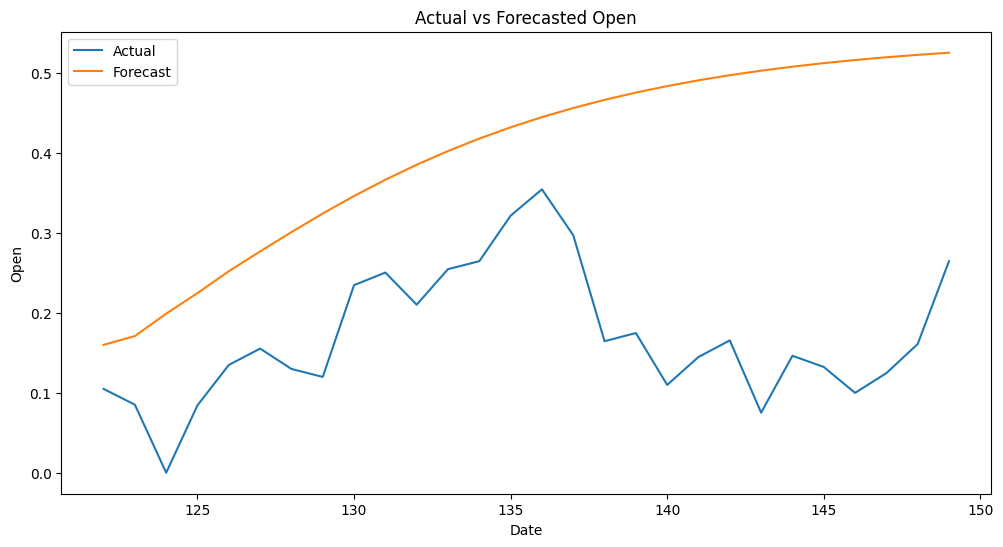

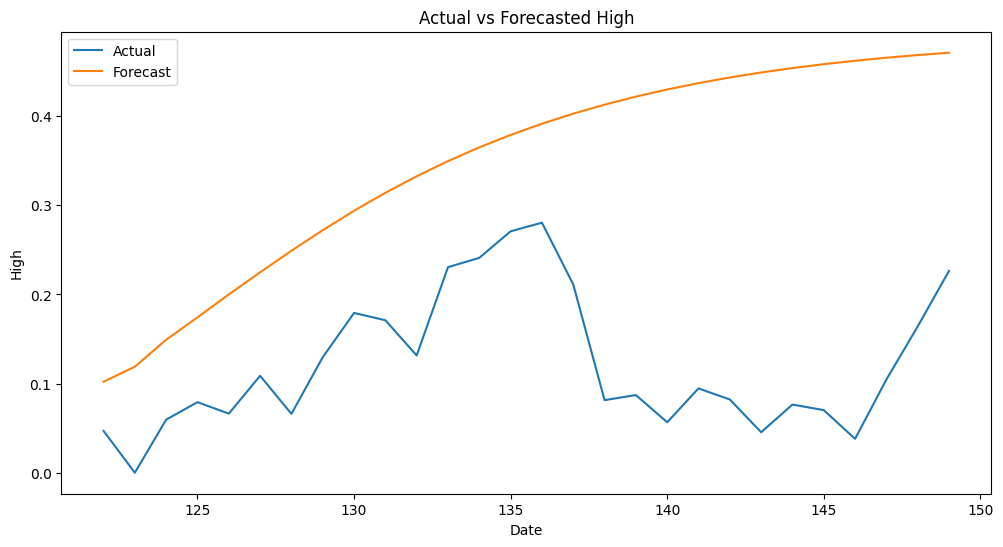

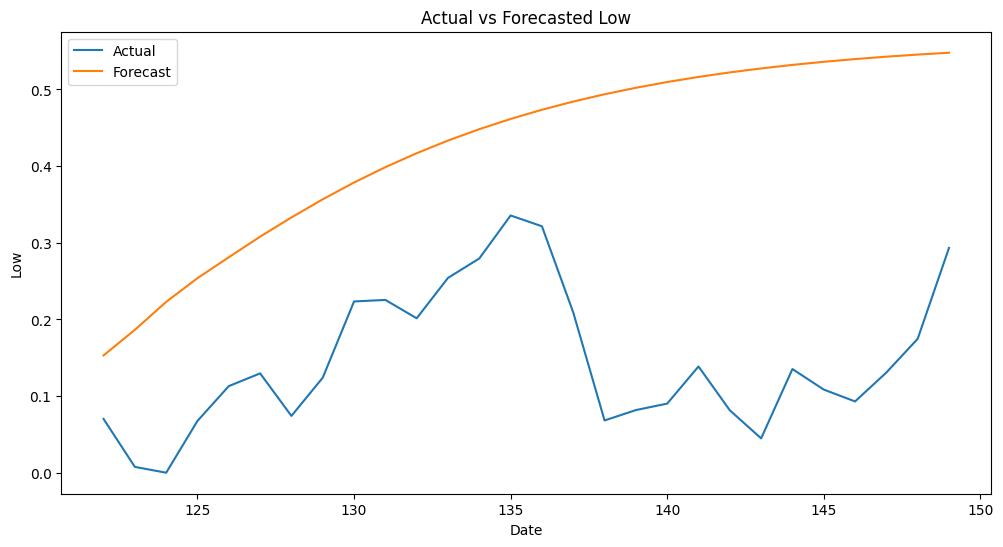

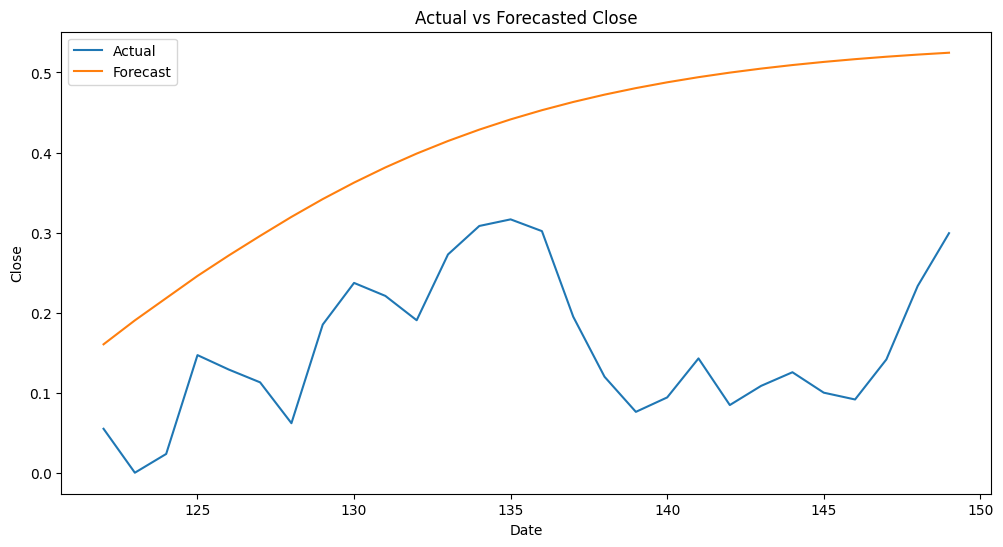

In [19]:
for col in listt:
    plot_forecast(pd.DataFrame(pred, columns=listt), pd.DataFrame(test, columns=listt), col)

In [23]:
preds = pd.DataFrame(pred, columns=listt)
preds = Ms.inverse_transform(preds)
forecasted_df = pd.DataFrame(preds, columns=listt)
print(forecasted_df)

          Open        High         Low       Close
0   680.026128  686.017558  675.158772  682.218807
1   682.235030  689.405757  681.079627  688.019990
2   687.850385  695.501234  687.551164  693.408083
3   693.001545  700.552900  693.044650  698.790917
4   698.481882  705.739498  697.875605  703.756172
5   703.441335  710.725996  702.652377  708.498205
6   708.274730  715.601482  707.098751  713.099118
7   712.942784  720.252736  711.299231  717.415365
8   717.333996  724.641943  715.185379  721.407150
9   721.402945  728.699762  718.733994  725.086381
10  725.161870  732.440465  721.962354  728.443221
11  728.593549  735.859175  724.889986  731.491440
12  731.714634  738.966788  727.528357  734.248899
13  734.540079  741.778116  729.899776  736.731304
14  737.085683  744.310907  732.023858  738.958313
15  739.371003  746.584006  733.920596  740.950541
16  741.416618  748.618108  735.610406  742.727718
17  743.242319  750.433305  737.112663  744.309437
18  744.867994  752.049336  738